### Part - A

DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

• DATA DESCRIPTION:

• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

### 1. Data Understanding & Exploration:

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

C. Merge both the DataFrames together to form a single DataFrame

D. Print 5 point summary of the numerical features and share insights.

In [389]:
import pandas as pdpae
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [390]:
# Read Dataset 1
pd1 = pd.read_csv('Car_name.csv')

In [391]:
# Read Dataset 2
pd2 = pd.read_json('Car-attributes.json')

In [392]:
# Combine the two datasets
dataset = pd1.join(pd2)

In [393]:
# Print the Datasets
dataset

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [394]:
# Print 5 point Summary
dataset.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


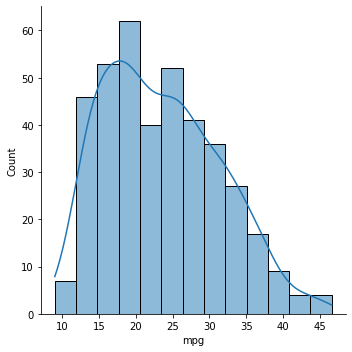

In [395]:
sns.displot(dataset['mpg'], kde=True)

<b>The MPG of the dataset seems to the right skewed with mean value of 23 MPG</b>

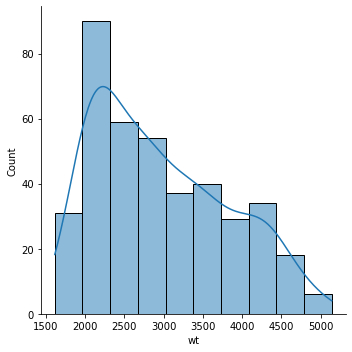

In [396]:
sns.displot(dataset['wt'], kde=True)

<b>The Weight of the dataset seems to the right skewed with most cars having mean wt af around 2 tonnes</b>

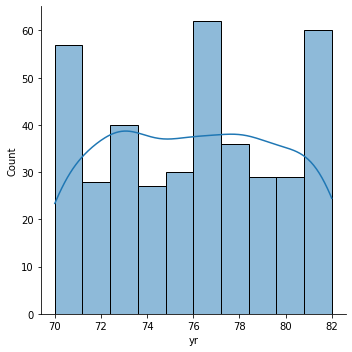

In [397]:
sns.displot(dataset['yr'], kde=True)

<b>The Model Year Distribution seems flat with most cars belonging to 1976 Model Yead</b>

### 2. Data Preparation & Analysis

#### 2.A Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [398]:
dataset.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [399]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [400]:
# it seems hp column has some invalid values
dataset['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

HP columns contains some invalid values, lets remove those values

In [401]:
dataset[dataset.hp == "?"]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [402]:
# % of rows with invalid values
((dataset[dataset.hp == "?"].shape[0])/(dataset.shape[0]))*100

1.507537688442211

There are 6 rows (1.5 %) with invalid values

In [403]:
# Lets remove these rows from dataset
dataset = dataset[dataset.hp != '?']

In [404]:
dataset.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, 100, 105, 175, 153, 180, 110,
       72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145, 137,
       158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61, 93,
       148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68, 58,
       149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [405]:
dataset.shape

(392, 9)

In [406]:
# Now convert hp column into float

dataset['hp'] = dataset['hp'].astype('int64', errors='raise')

<ipython-input-406-8592ffaae2aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['hp'] = dataset['hp'].astype('int64', errors='raise')


In [407]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int64  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [408]:
dataset.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

#### 2.B Check for duplicate values in the data and impute with the best suitable approach.

In [409]:
dataset.describe(include='all')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
unique,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,toyota corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,NaN,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,NaN,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,NaN,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,NaN,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000


<b>The dataset doesn't contains any valid duplicates as name columns can have duplicates</b>

#### 2.C Plot a pairplot for all features

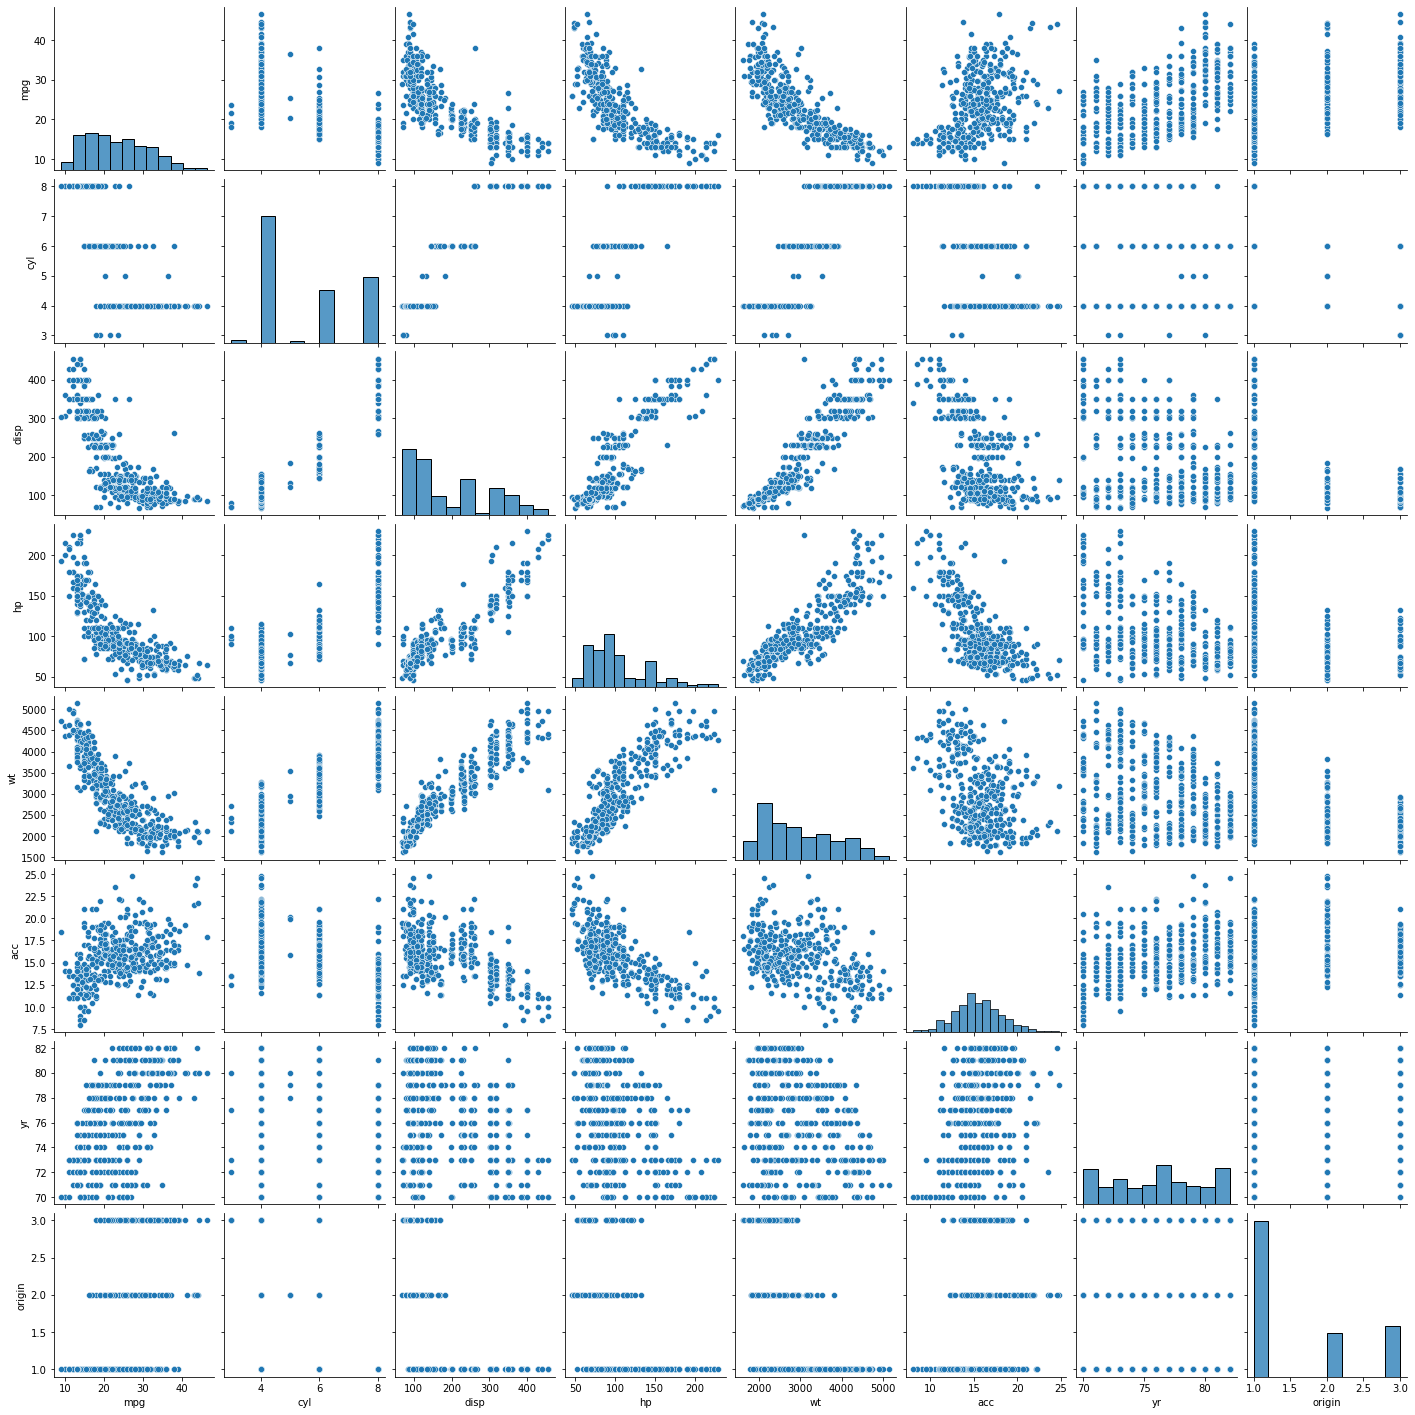

In [410]:
sns.pairplot(dataset)

#### 2.D Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='disp', ylabel='wt'>

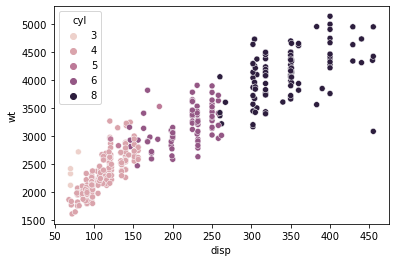

In [411]:
sns.scatterplot(data=dataset, x="disp", y="wt", hue="cyl")

#### 2.E Share Insights 

<b> It seems heavier car has bigger engine with more cylider count and higher displacement and vice versa </b>

#### 2.F Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

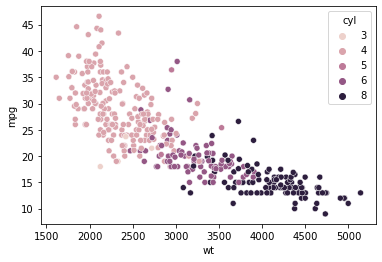

In [412]:
sns.scatterplot(data=dataset, x="wt", y="mpg", hue="cyl")

#### 2.G Share insights

<b>It seems lighter cars have higher mpg values with smaller engines sizes</b>

#### 2.H Check for unexpected values in all the features and datapoints with such values

<b> This has already been handled in Step 2.A </b>

### 3. Clustering

#### 3.A Apply K-Means clustering for 2 to 10 clusters. 

In [413]:
# Drop 'Car name' Column
dataset.drop('car_name', axis=1, inplace=True)
# Scale the Dataset using Zscore
dataset = dataset.apply(zscore)

D:\official\softwares\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 2.B Visualize the Elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

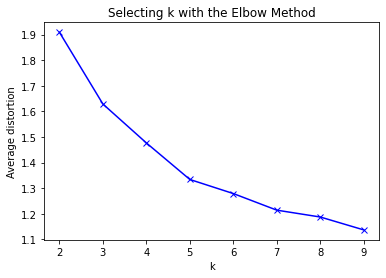

In [414]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataset)
    # prediction=model.predict(dataset)
    meanDistortions.append(sum(np.min(cdist(dataset, model.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### 2.C On the above visual, highlight which are the possible Elbow points

<b>The Elbow Point apprears to be a 5 Clusters</b>

#### 2.D Train a K-means clustering model once again on the optimal number of clusters

In [415]:
model=KMeans(n_clusters=5)
test_data = dataset.iloc[-1:]
train_data = dataset.iloc[:-1,:]
model.fit(dataset)
prediction = model.predict(train_data)


#### 2.E Add a new feature in the DataFrame which will have labels based upon cluster value.

In [416]:
#Append the prediction 
train_data["category"] = prediction
print("Groups Assigned : \n")
train_data

Groups Assigned : 



<ipython-input-416-edbf82273da1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["category"] = prediction


,mpg,cyl,disp,hp,wt,acc,yr,origin,category
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,0
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,0
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,0
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,0
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,0
...,...,...,...,...,...,...,...,...,...
392,0.455941,-0.864014,-0.415384,-0.376395,-0.032516,0.638278,1.636410,-0.716641,1
393,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641,1
394,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382,4
395,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641,1


In [417]:
train_data.category.unique()

array([0, 3, 2, 4, 1])

#### 2.F Plot a visual and color the datapoints based upon clusters. 

In [418]:
mean_values_df = train_data.groupby(['category'])

In [419]:
mean_values_df.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
category,,,,,,,,
0,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641
1,0.703294,-0.744781,-0.593596,-0.570275,-0.505603,0.339993,0.982366,-0.619530
2,-0.559929,0.442040,0.377479,-0.064562,0.384632,0.394206,-0.069201,-0.670028
3,0.149908,-0.835725,-0.819852,-0.491417,-0.738321,0.192703,-0.718189,0.676144
4,1.358529,-0.813700,-0.905971,-0.837200,-0.966061,0.435036,0.925820,1.503044


<AxesSubplot:xlabel='mpg', ylabel='wt'>

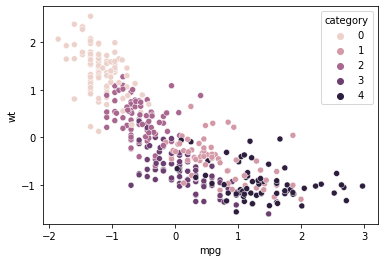

In [420]:
sns.scatterplot(data=train_data, x="mpg", y="wt", hue="category")

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[category]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[category]'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

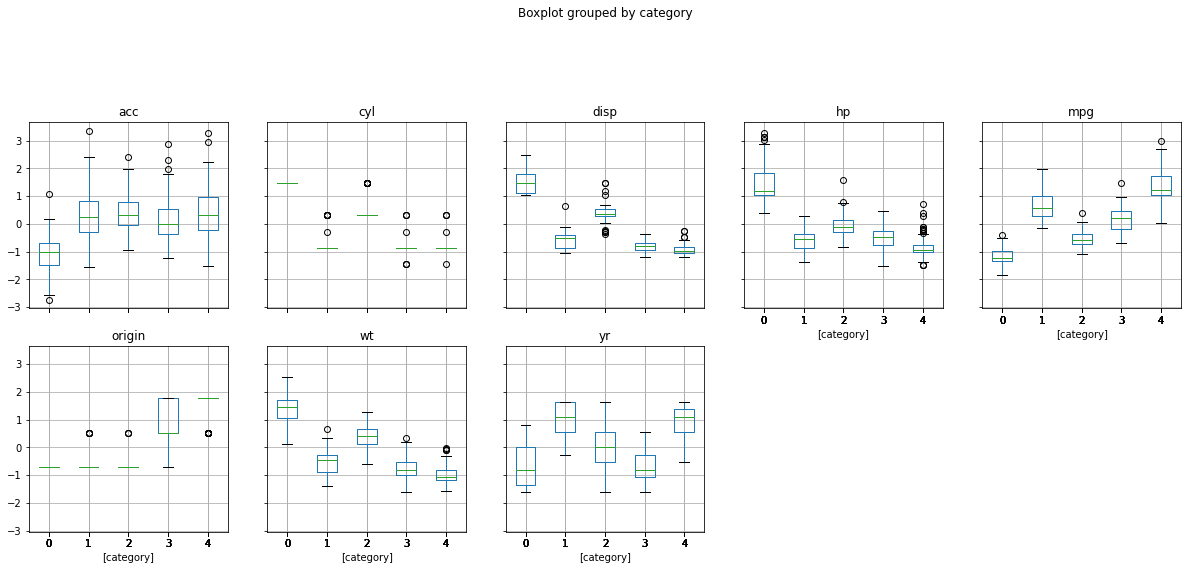

In [421]:
train_data.boxplot(by='category', layout = (5,5),figsize=(20,20))

#### 2. Predict a new datapoint

In [422]:
prediction = model.predict(test_data)

In [425]:
test_data['category'] = prediction

<ipython-input-425-eafa684dc159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['category'] = prediction


In [426]:
test_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,category
397,0.969088,-0.864014,-0.721574,-0.584501,-0.303641,1.400433,1.63641,-0.716641,1


### Part - B

#### 1  Data Understanding & Cleaning

#### 1.A Read ‘vehicle.csv’ and save as DataFrame

In [262]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [263]:
raw_data = pd.read_csv('vehicle.csv')

#### 1.B Check percentage of missing values and impute with correct approach.

In [264]:
raw_data.shape

(846, 19)

In [265]:
raw_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [266]:
raw_data.fillna(raw_data.mean(), inplace=True)

# raw_data = raw_data.replace(' ', np.nan)

# for i in raw_data.columns[:17]:
#     median_value = raw_data[i].median()
#     raw_data[i] = raw_data[i].fillna(median_value)

In [267]:
raw_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### 1.C Visualize a Pie-chart and print percentage of values for variable ‘class’.

<AxesSubplot:ylabel='class'>

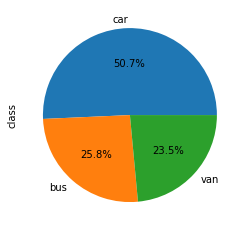

In [268]:
raw_data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### 1.D Check for duplicate rows in the data and impute with correct approach.

In [269]:
raw_data.drop_duplicates(keep=False, inplace=True)

In [270]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [271]:
raw_data.shape

(846, 19)

D:\official\softwares\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

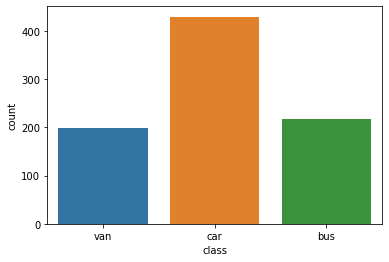

In [272]:
sns.countplot(raw_data['class'])

In [273]:
#class attribute is not an object it is a category
raw_data['class']=raw_data['class'].astype('category')

In [274]:
# Label Encode the Class Column
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [275]:
raw_data['class'] = labelEncoder.fit_transform(raw_data['class'])

D:\official\softwares\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

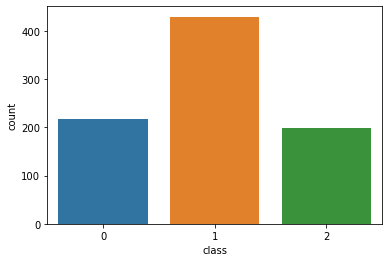

In [276]:
sns.countplot(raw_data['class'])

### 2 Data Preparation

#### 2.1 Split data into X and Y

In [397]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#independent and dependent variables
X=  raw_data.iloc[:,0:-1]
y = raw_data.iloc[:,-1]

#### 2.2 Standardize the Data.

In [398]:
standardScaler = StandardScaler()
X = pd.DataFrame(standardScaler.fit_transform(X), columns=X.columns)

# minMaxScaler = MinMaxScaler()
# X = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [399]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,5.572112e-16,1.000592,-2.512695,-0.811520,-0.082445,0.768143,3.076880
circularity,846.0,-1.984228e-16,1.000592,-1.929554,-0.787688,-0.135193,0.680426,2.311663
distance_circularity,846.0,3.564262e-16,1.000592,-2.676807,-0.769817,-0.134154,1.010040,1.899969
radius_ratio,846.0,-2.217821e-16,1.000592,-1.943850,-0.835442,-0.026605,0.782233,4.916292
pr.axis_aspect_ratio,846.0,-3.639064e-16,1.000592,-1.863407,-0.593962,-0.086184,0.421594,9.688542
max.length_aspect_ratio,846.0,-2.036721e-16,1.000592,-1.428157,-0.340845,-0.123383,0.311542,10.097349
scatter_ratio,846.0,-6.010427e-16,1.000592,-1.715171,-0.660178,-0.358751,0.877098,2.896657
elongatedness,846.0,-7.726942e-16,1.000592,-1.912878,-1.016240,0.264671,0.648945,2.570312
pr.axis_rectangularity,846.0,-5.784708e-16,1.000592,-1.384896,-0.611739,-0.225160,0.934576,3.254047
max.length_rectangularity,846.0,7.968409e-16,1.000592,-2.067876,-0.758169,-0.137782,0.758332,2.757358


In [400]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

### 3. Model Building

#### 3.1 Train a base Classification model using SVM.

In [401]:
from sklearn.svm import SVC
svc = SVC()

In [402]:
svc.fit(X_train, y_train)

SVC()

In [403]:
y_pred = svc.predict(X_test)

#### 3.B Print Classification metrics for train data.

In [404]:
print('Accuracy on Training data: ',svc.score(X_train, y_train))
print('Accuracy on Testing data: ', svc.score(X_test , y_test))
print("Classification Report:\n",metrics.classification_report(y_pred,y_test))

Accuracy on Training data:  0.9746621621621622
Accuracy on Testing data:  0.9606299212598425
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       0.96      0.98      0.97       123
           2       0.97      0.89      0.93        63

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.96       254
weighted avg       0.96      0.96      0.96       254



#### 3.C Apply PCA with 10 components

In [405]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [406]:
print(pca.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [407]:
print(pca.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


#### 3.D Visualize Cumulative Variance Explained with Number of Components
#### 3.E Draw a horizontal line on the above plot to highlight the threshold of 90%

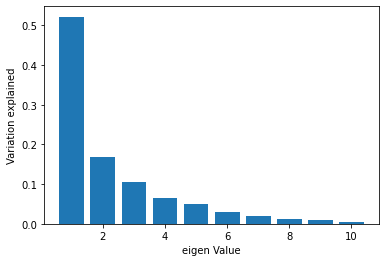

In [408]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_)
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

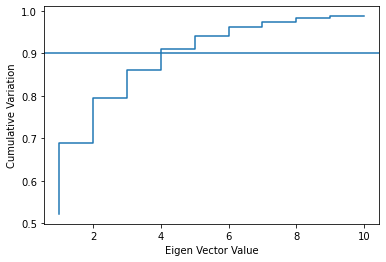

In [409]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9)
plt.ylabel('Cumulative Variation')
plt.xlabel('Eigen Vector Value')
plt.show()

<b>We can reduce the no of dimensions to 4 as it seems to cover 90% of variation</b>

#### 3.F Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [410]:
pca = PCA(n_components=4)
pca.fit(X)
print(pca.explained_variance_ratio_)
Xpca4 = pd.DataFrame(pca.transform(X))

[0.52206485 0.16736054 0.10562382 0.0654932 ]


#### 3.G Train SVM model on components selected from above step.

In [411]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Xpca4, y, test_size = 0.3, random_state = 10)

In [412]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [413]:
y_pred = svc.predict(X_test)

#### 3.H Print Classification metrics for train data of above model and share insights.

In [414]:
print('Accuracy on Training data: ',svc.score(X_train, y_train))
print('Accuracy on Testing data: ', svc.score(X_test , y_test))
print("Classification Report:\n",metrics.classification_report(y_pred,y_test))

Accuracy on Training data:  0.7922297297297297
Accuracy on Testing data:  0.7716535433070866
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.86      0.72        51
           1       0.90      0.80      0.85       142
           2       0.67      0.64      0.66        61

    accuracy                           0.77       254
   macro avg       0.73      0.77      0.74       254
weighted avg       0.79      0.77      0.78       254



<b>Conclusion: We have reduced total dimentions to 4 from 17 with loss of training accuracy from 96% to 79%</b>

<b>There has been a significant loss of training accuracy<b>



### 4 Performance Improvement

#### 4.A Train a better model

In [420]:
# Lets Try with 6 Dimensions PCA model
pca = PCA(n_components=6)
pca.fit(X)
print(pca.explained_variance_ratio_)
Xpca6 = pd.DataFrame(pca.transform(X))

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458]


In [421]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 10)

In [422]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [423]:
y_pred = svc.predict(X_test)

In [424]:
print('Accuracy on Training data: ',svc.score(X_train, y_train))
print('Accuracy on Testing data: ', svc.score(X_test , y_test))
print("Classification Report:\n",metrics.classification_report(y_pred,y_test))

Accuracy on Training data:  0.9037162162162162
Accuracy on Testing data:  0.8622047244094488
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        60
           1       0.90      0.86      0.88       130
           2       0.86      0.78      0.82        64

    accuracy                           0.86       254
   macro avg       0.85      0.86      0.86       254
weighted avg       0.87      0.86      0.86       254



<b>With 6 dimensions, accuracy has significantly increased to 90% </b>

### 5. Data Understanding

#### 5.A Explain pre-requisite/assumptions of PCA

Assumption #1: The dataset should have higher number of columns or dimensions

Assumption #2: Some columns should higher weitage in explaining the variance in the dependent variable as compared to rest of the columns

#### 5.B Explain advantages and limitations of PCA

Advantage #1: PCA helps in reducing the complexity in data without compromising much on the model accuracy

Advantahe #2: PCA helps in removing clumns which don't contribute much in predicting the dependent variable

Limitation #1: Columns transformed after PCA cannot be interpreted correctly (We cant make any sense out of those columns)

Limitation #2: Some amount of Information loss do happen